# Figure 2

In [1]:
using LaTeXStrings, LinearAlgebra, Random, Statistics, StatsPlots
pyplot()
versioninfo()

Julia Version 1.4.1
Commit 381693d3df* (2020-04-14 17:20 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU E5-2667 v2 @ 3.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, ivybridge)


## Generate data

In [2]:
Random.seed!(1)

n, p = 50, 80
θ = 3

u = [ones(n÷2); -ones(n÷2)]/sqrt(n)
v = [ones(p÷2); -ones(p÷2)]/sqrt(p)

S = θ*u*v'
N = [[sqrt(1/14)*randn(n÷10*7,p÷4*3); sqrt(19/6)*randn(n÷10*3,p÷4*3)] randn(n,p÷4*1)]/sqrt(n)

X = S + N
#;

## Visualize data

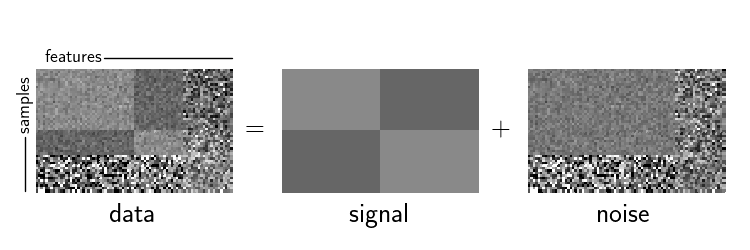

In [3]:
hgap, vgap, lgap = 20, 10, 4
msize, nsize, lsize = 20, 20, 13
flength, slength = 24, 24
figsize, figdpi = (750, 250), 100
crange = 0.35

heatmap([X fill(NaN,n,hgap) S fill(NaN,n,hgap) N],yflip=true,aspect_ratio=1,color=:greys,colorbar=nothing,clim=(-crange,crange),bordercolor=:white,axis=nothing,dpi=figdpi,size=figsize)
annotate!([(p+hgap/2,n/2,Plots.text(L"=",msize,:center)),(p+hgap+p+hgap/2,n/2,Plots.text(L"+",msize,:center))])
annotate!([(p/2,n+vgap,Plots.text("data",nsize,:center)),(p+hgap+p/2,n+vgap,Plots.text("signal",nsize,:center)),(p+hgap+p+hgap+p/2,n+vgap,Plots.text("noise",nsize,:center))])
annotate!([(lgap,-lgap,Plots.text("features",lsize,:left)),(-lgap,lgap,Plots.text("samples",lsize,:top,rotation=90))])
plot!([lgap + flength,p],[-lgap,-lgap],color=:black,label="")
plot!([-lgap,-lgap],[lgap + slength,n],color=:black,label="")

## Parallel analysis via permutations

In [4]:
Random.seed!(0)

σs = [svdvals(mapslices(shuffle,X,dims=1)) for _ in 1:10000]
σs = [getindex.(σs,j) for j in 1:min(n,p)]

α = 0.95
rhat = findfirst(svdvals(X) .<= quantile.(σs,α)) - 1

9

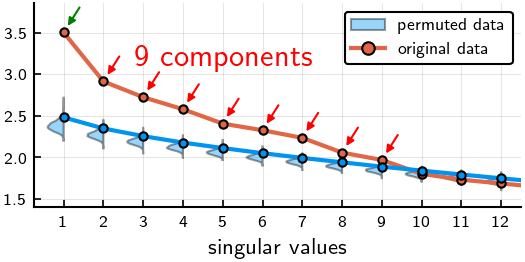

In [5]:
hptr, vptr, pptr = 0.4, 0.3, 0.66

plot(xlims=(0.25,12.5),xticks=1:16,ylims=(1.4,3.85),yticks=0:0.5:5,dpi=150,size=(350,175))
xlabel!("singular values")
violin!(σs[1],side=:left,label="permuted data",color=RGB(0,0.58,0.95),opacity=0.4)
violin!(σs[2:end],side=:left,label="",color=RGB(0,0.58,0.95),opacity=0.4)
plot!(svdvals(X),label="original data",linewidth=2,marker=:circle,color=RGB(0.88,0.4,0.27))
plot!(quantile.(σs,α),label="",linewidth=2,marker=:circle,color=RGB(0,0.58,0.95))
quiver!((1:1).+hptr,svdvals(X)[1:1].+vptr,quiver=(fill(-pptr*hptr,1),fill(-pptr*vptr,1)),linewidth=1,arrow=1,color=:green)
quiver!((2:rhat).+hptr,svdvals(X)[2:rhat].+vptr,quiver=(fill(-pptr*hptr,rhat-1),fill(-pptr*vptr,rhat-1)),linewidth=1,arrow=1,color=:red)
annotate!([(2.8,3.2,text("$rhat component$(rhat > 1 ? "s" : "")",15,(rhat > 1 ? :red : :green),:left))])